# The Efficient Frontier

The efficient frontier is a concept used in modern portfolio theory (MPT) to describe the set of optimal portfolios. It represents a graph of all possible combinations of assets that produce the maximum expected return for any given level of risk, or the minimum risk for any given level of expected return.

- **Calculation**: The efficient frontier is derived through mathematical optimization techniques, typically involving the calculation of expected returns, volatilities (standard deviations), and correlations of different assets in the portfolio. 

- **Interpretation**: Portfolios lying on the efficient frontier are considered to be optimal because they provide the best risk-return trade-off. 

- **Risk and Return**: The efficient frontier illustrates the fundamental trade-off between risk and return in investing. Investors must decide their risk tolerance and investment objectives to choose a portfolio that lies on the efficient frontier and aligns with their preferences.

- **Capital Allocation Line (CAL)**: The tangent line drawn from the risk-free rate to the efficient frontier is called the Capital Allocation Line (CAL). The point at which the CAL intersects the efficient frontier represents the optimal portfolio that maximizes the Sharpe ratio, a measure of risk-adjusted return.

```python
def get_ind_returns():
    """
    Load and format the Ken French 30 Industry Portfolios Value Weighted Monthly Returns
    """
    ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind
```

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import edhec_risk_kit_107 as erk
ind = erk.get_ind_returns()
ind.shape

(1110, 30)

<Axes: >

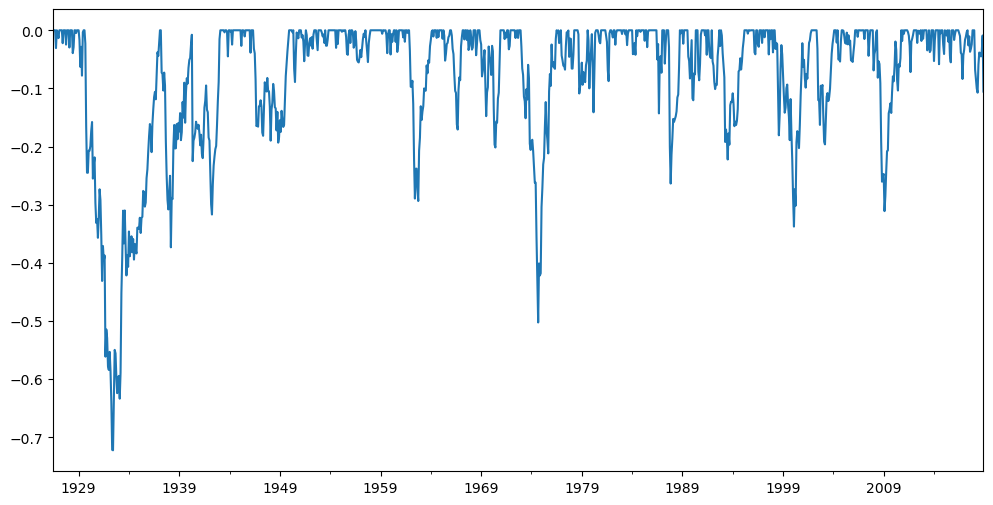

In [22]:
erk.drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [24]:
erk.var_gaussian(ind[["Food", "Beer", "Smoke"]], modified=True)

Food     0.061207
Beer     0.033881
Smoke    0.080292
dtype: float64

<Axes: >

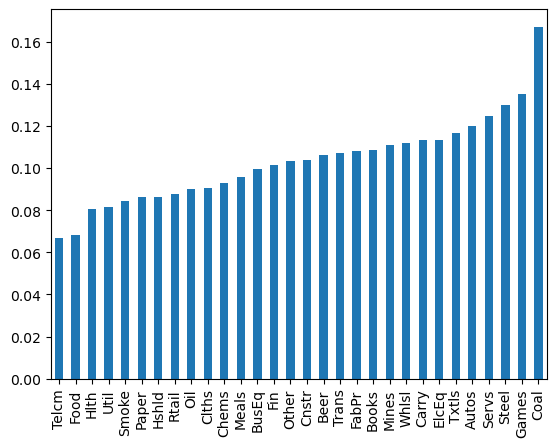

In [26]:
erk.var_gaussian(ind).sort_values().plot.bar()


```python
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

```

In [29]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values()

Coal     0.084275
Steel    0.126052
Whlsl    0.143494
Other    0.160862
Mines    0.177109
Books    0.192686
Games    0.194420
Txtls    0.194906
Trans    0.214624
Autos    0.227548
Cnstr    0.229351
FabPr    0.265297
Servs    0.267263
Fin      0.282243
Carry    0.285916
ElcEq    0.293063
Clths    0.293105
Util     0.306945
Hshld    0.307349
Oil      0.330358
Meals    0.332717
BusEq    0.342974
Chems    0.344903
Beer     0.351780
Rtail    0.364325
Paper    0.364722
Telcm    0.383294
Hlth     0.437783
Smoke    0.446361
Food     0.454770
dtype: float64

<Axes: title={'center': 'Industry Sharpe Ratios 1926-2018'}>

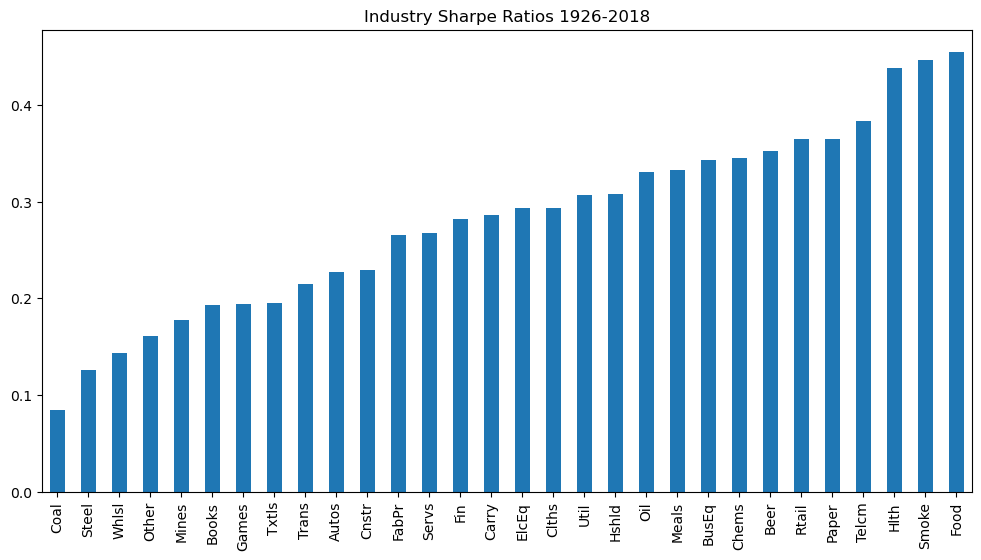

In [32]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018", figsize=(12,6))

<Axes: title={'center': 'Industry Sharpe Ratios since 2000'}>

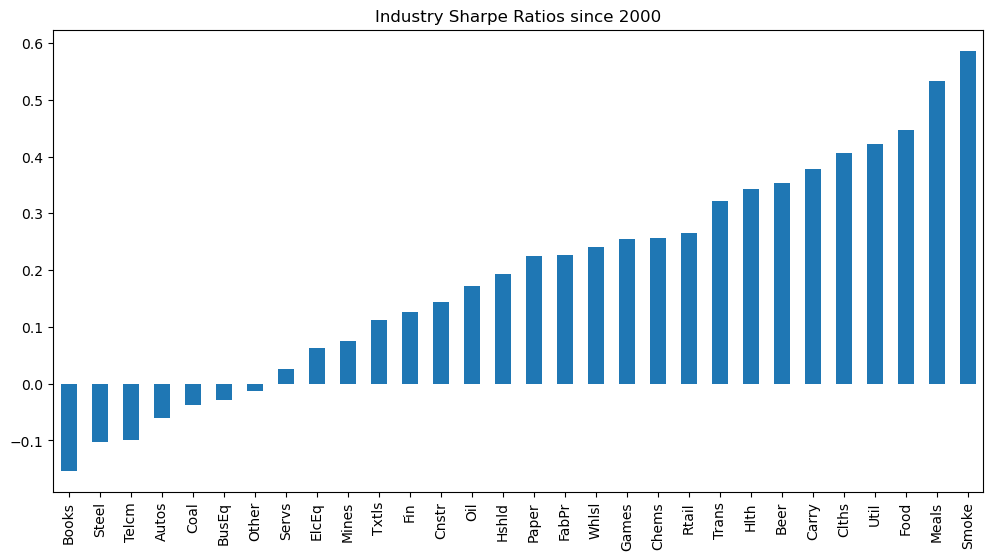

In [34]:
erk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title='Industry Sharpe Ratios since 2000', figsize=(12,6))

## Expected Returns and the Covariance Matrix

Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estimate these simply by looking back in time and naively assuming they will hold in the future.

We can generate an estimate of expected returns using the `annualize_rets()` function, that returns a vector of expected returns. 

In [37]:
er = erk.annualize_rets(ind["1995":"2000"], 12)

<Axes: >

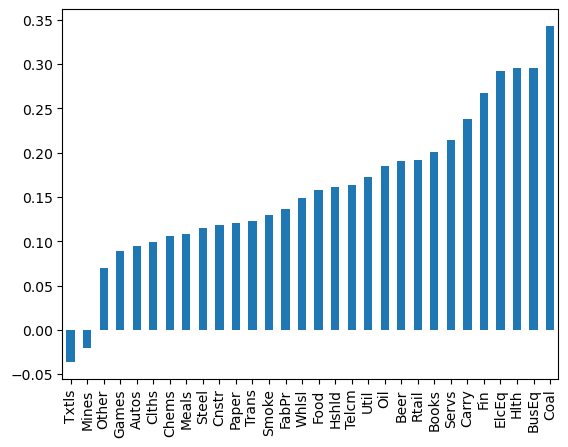

In [39]:
er.sort_values().plot.bar()

Finally, let's generate the covariance matrix. Fortunately, this is easy enough to do using the `.cov` method:

In [42]:
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)

In [44]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668



```python

def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

```

The volatility is just as easy in matrix form:

```python
def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5
```



In [21]:
l = ["Food", "Beer", "Smoke", "Coal", "Meals"]

In [23]:
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
Meals    0.067400
dtype: float64

In [25]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal,Meals
Food,0.002609,0.002379,0.002061,0.000027,0.001230
Beer,0.002379,0.005264,0.001359,0.001728,0.001822
Smoke,0.002061,0.001359,0.008349,-0.000733,0.000703
Coal,0.000027,0.001728,-0.000733,0.018641,0.000614
Meals,0.001230,0.001822,0.000703,0.000614,0.002979


In [29]:
ew = np.repeat(0.2, 5)
erk.portfolio_return(ew, er[l])

0.16956876410191923

In [31]:
erk.portfolio_vol(ew, cov.loc[l,l])

0.04907965105157771

# The 2-Asset Case

In the case of 2 assets, the problem is somewhat simplified, since the weight of the second asset is 1-the weight of the first asset.

We start by generating a sequence of weights in a list of tuples. Python makes it easy to generate a list by using a _list comprehension_ 

In [34]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [36]:
type(weights)

list

In [38]:
len(weights)

20

In [40]:
weights[0]

array([0., 1.])

In [42]:
weights[4]

array([0.21052632, 0.78947368])

In [44]:
weights[19]

array([1., 0.])

<Axes: xlabel='V', ylabel='R'>

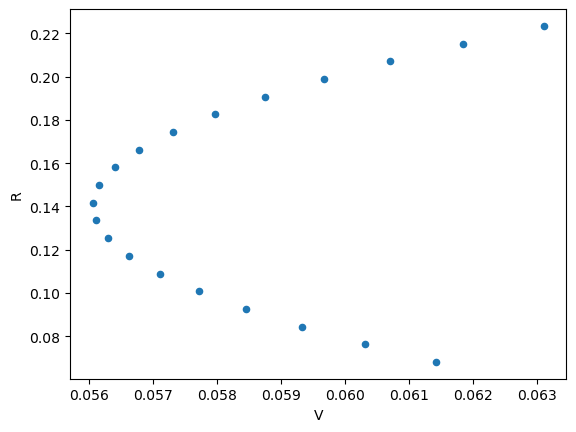

In [46]:
l = ["Games", "Fin"]
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "V": vols})
ef.plot.scatter(x="V", y="R")

We can create function that plots the frontier:

```python
def plot_ef2(n_points, er, cov):
    """
    Plots the 2-asset efficient frontier
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=".-")
```

A useful summary of the visualization features in pandas is [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


<Axes: xlabel='Volatility'>

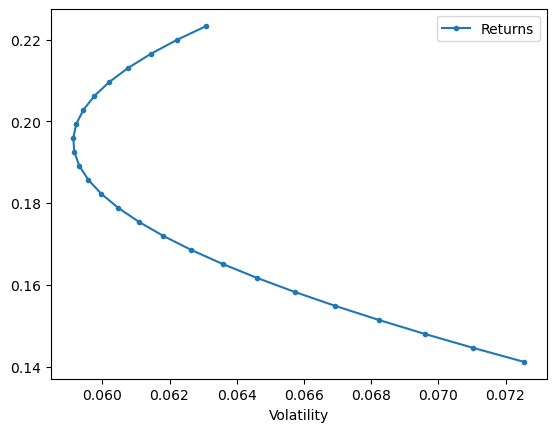

In [49]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l].values, cov.loc[l,l])